In [1]:
import glob
import os

#import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import seaborn as sns
import palettable.colorbrewer.diverging as pld

import numpy as np
import pandas as pd
from sklearn import preprocessing

from scipy import integrate  
#import scipy.signal as scipy
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

%matplotlib widget

In [2]:
## Plotting parameters

palette = pld.RdYlGn_4_r
cmap = palette.mpl_colormap
transparency = 0.7
labelsize = 20
spinewidth = 3
fontsize = 26
legendsize = 20
fontweight = 'bold'
labelpad = 6
pad = 10
linewidth = 2.5


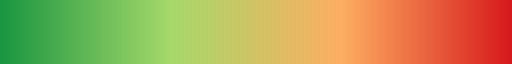

In [3]:
cmap

In [4]:
## Find the subfolders in the current working folder (cwd)
#cwd = os.getcwd()
# cwd = '/nsls2/users/clin1/Documents/Cheng-Hung/temp/20221108_insitu'
cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230224_CsPbBr_ZnI'
subfolder = glob.glob(cwd + '/CsPb**')
subfolder.sort()
# del subfolder[-1]
print(*subfolder, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230224_CsPbBr_ZnI/CsPb_6mM_Br_12mM_I_000
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230224_CsPbBr_ZnI/CsPb_6mM_Br_12mM_I_008
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230224_CsPbBr_ZnI/CsPb_6mM_Br_12mM_I_016
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230224_CsPbBr_ZnI/CsPb_6mM_Br_12mM_I_032
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230224_CsPbBr_ZnI/CsPb_6mM_Br_12mM_I_048
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230224_CsPbBr_ZnI/CsPb_6mM_Br_12mM_I_064
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230224_CsPbBr_ZnI/CsPb_6mM_Br_12mM_I_080
/Users/chenghunglin/Library/CloudS

In [5]:
title = [os.path.basename(subfolder[i]) for i in range(len(subfolder))]
print(*title, sep='\n')

title = ['CsPb 6mM + Br 12 mM',
         'CsPb 6mM + Br 12 mM + ZnI2 8uL/min', 
         'CsPb 6mM + Br 12 mM + ZnI2 16uL/min',
         'CsPb 6mM + Br 12 mM + ZnI2 32uL/min',
         'CsPb 6mM + Br 12 mM + ZnI2 48uL/min',
         'CsPb 6mM + Br 12 mM + ZnI2 64uL/min',
         'CsPb 6mM + Br 12 mM + ZnI2 80uL/min',
         'CsPb 6mM + Br 12 mM + ZnI2 96uL/min',
         'CsPb 6mM + Br 12 mM + ZnI2 112uL/min',
         'CsPb 6mM + Br 12 mM + ZnI2 128uL/min']
         # 'Insitu CsPb 6mM + Br 6 mM + ZnI2 128uL/min']

label = ['CsPbBr',
         'ZnI2 8 uL/min', 
         'ZnI2 16 uL/min',
         'ZnI2 32 uL/min',
         'ZnI2 48 uL/min',
         'ZnI2 64 uL/min', 
         'ZnI2 80 uL/min',
         'ZnI2 96 uL/min',
         'ZnI2 112 uL/min',
         'ZnI2 128 uL/min']
         # 'ZnI2 128 uL/min']

CsPb_6mM_Br_12mM_I_000
CsPb_6mM_Br_12mM_I_008
CsPb_6mM_Br_12mM_I_016
CsPb_6mM_Br_12mM_I_032
CsPb_6mM_Br_12mM_I_048
CsPb_6mM_Br_12mM_I_064
CsPb_6mM_Br_12mM_I_080
CsPb_6mM_Br_12mM_I_096
CsPb_6mM_Br_12mM_I_112
CsPb_6mM_Br_12mM_I_128


In [6]:
## Reading dark and reference
dark = glob.glob(cwd + '/' + 'Dark_100**.csv')
ref = glob.glob(cwd + '/' + 'tol**100**.csv')

dark_df = pd.read_csv(dark[0], skiprows=5, sep=',')
ref_df = pd.read_csv(ref[0], skiprows=5, sep=',')

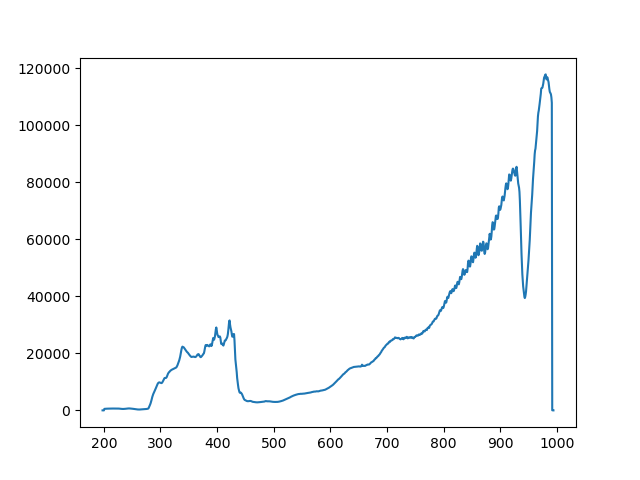

In [7]:
plt.figure()
plt.plot(ref_df.Energy, ref_df.Sample)

/opt/anaconda3/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered

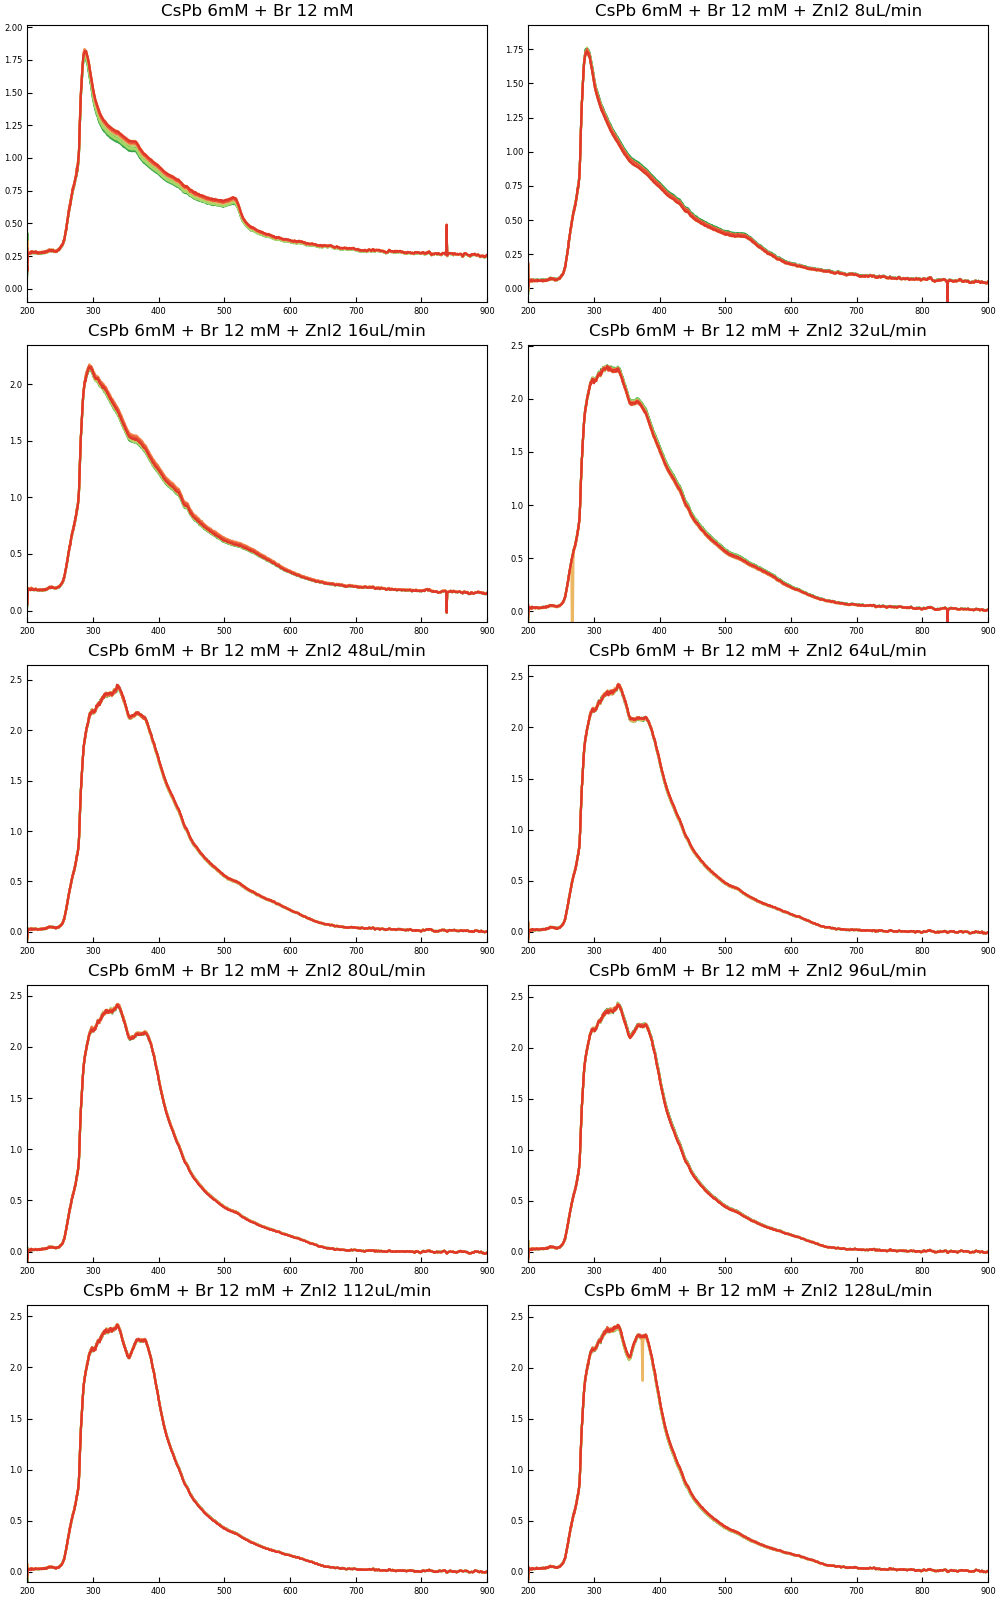

In [8]:
import warnings
warnings.filterwarnings(action='once')

## Plot All PL profiles in each subfolder
#f1, ax1 = plt.subplots(2, int(np.rint(len(subfolder)/2)), figsize = (10, 8), constrained_layout=True)
f1, ax1 = plt.subplots(5, 2, figsize = (10, 16), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

ax1 = ax1.flatten()
df = pd.DataFrame()
df_norm = pd.DataFrame()
df_norm2 = pd.DataFrame()

## Wavelength range
w1 = 20
w2 = 770

for i in range(len(subfolder)):
# for i in range(1):
    data_files = glob.glob(subfolder[i] + '/**Abs**.csv')
    data_files.sort()
    del data_files[0]
    
    ## Data file range
    k1 = 0
    k2 = len(data_files)
    
    color_idx = np.linspace(0, 1, k2-k1+1)
    #ax1[i].set_title(os.path.basename(subfolder[i]), {'fontsize': 14, 'fontweight': fontweight})
    ax1[i].set_title(title[i], fontsize=12)
    df_i = pd.DataFrame()
    
    if i == 0: skiprows=8
    else: skiprows=10
    
    for j in range(k1, k2):
        # df_j = pd.read_csv(data_files[j], names=['wavelength', 'intensity'], skiprows=14, sep='\t')
        df_j = pd.read_csv(data_files[j], skiprows=skiprows, sep=',')
        absorbance = -np.log10((df_j.Sample-dark_df.Sample)/(ref_df.Sample-dark_df.Sample))
        ax1[i].plot(df_j.Energy, absorbance, color=cmap(color_idx[j-k1]))
        ax1[i].set_xlim(200, 900)
        ax1[i].set_ylim(-0.1, max(absorbance[100:800])+0.2)
        ax1[i].tick_params(axis='both', direction='in', labelsize=6)
        
        ## Insert Annotation
        '''
        at = AnchoredText(label[i], prop=dict(size=10), frameon=True, loc='upper right')
        at.patch.set_boxstyle("round,pad=0.01,rounding_size=0.3")
        ax1[i].add_artist(at)
        '''
        
        #df_i[f'Iten_{j}'] = df_j.intensity
        df_i = pd.concat([df_i, absorbance], axis=1, ignore_index=True)
    
    df[f'{os.path.basename(subfolder[i])}']= df_i.mean(axis=1)
    #df_norm[f'{os.path.basename(subfolder[i])}']= df_i.mean(axis=1) / df_i.mean(axis=1).sum(axis=0)
    df_norm[f'{os.path.basename(subfolder[i])}']= df[f'{os.path.basename(subfolder[i])}'].loc[w1:w2] / df[f'{os.path.basename(subfolder[i])}'].loc[w1:w2].sum(axis=0)
    
    
    x = df[f'{os.path.basename(subfolder[i])}'].loc[w1:w2].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x.reshape(-1,1))
    df_norm2[f'{os.path.basename(subfolder[i])}']= x_scaled.flatten()

    
df['Energy'] = df_j.Energy
df_norm['Energy'] = df_j.Energy.loc[w1:w2]
#df_norm2['wavelength'] = df_j.wavelength.loc[w1:w2]
df_norm2.loc[0:w2-w1, 'Energy'] = df_j.Energy.loc[w1:w2].values

In [9]:
# img_name = 'baseline_test_02.png'
# plt.savefig(cwd + '/' + img_name, dpi = 300,  transparent=False)

In [10]:
df[210:215]

,CsPb_6mM_Br_12mM_I_000,CsPb_6mM_Br_12mM_I_008,CsPb_6mM_Br_12mM_I_016,CsPb_6mM_Br_12mM_I_032,CsPb_6mM_Br_12mM_I_048,CsPb_6mM_Br_12mM_I_064,CsPb_6mM_Br_12mM_I_080,CsPb_6mM_Br_12mM_I_096,CsPb_6mM_Br_12mM_I_112,CsPb_6mM_Br_12mM_I_128,Energy
210,1.092530,0.907093,1.510603,1.977822,2.156741,2.080834,2.114234,2.195306,2.241870,2.293064,364.721267
211,1.091301,0.906297,1.509485,1.982138,2.169310,2.088140,2.123654,2.208958,2.258354,2.306587,365.509089
212,1.086060,0.902451,1.507864,1.983440,2.170901,2.093319,2.126555,2.220035,2.265126,2.313515,366.296840
213,1.080989,0.900533,1.504076,1.980348,2.163175,2.089807,2.128270,2.215825,2.267550,2.314891,367.084519
214,1.074693,0.898349,1.501105,1.977405,2.164992,2.090074,2.129172,2.220136,2.271585,2.317021,367.872128


/opt/anaconda3/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


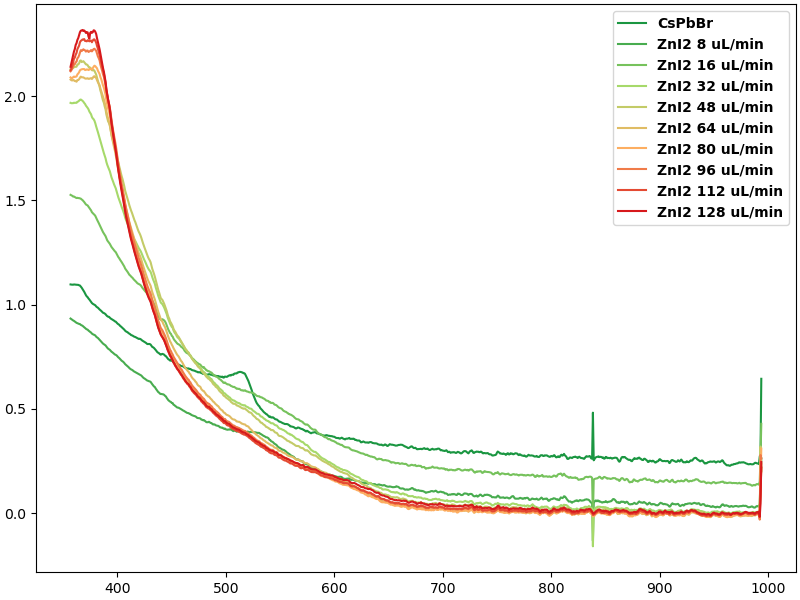

In [11]:
## Plot average absorption profiles in each subfolder
f2, ax2 = plt.subplots(1, 1, figsize = (8, 6), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

## Wavelength range
w1 = 200
w2 = 1043

k = len(subfolder)
color_idx = np.linspace(0, 1, k)
for i in range(len(subfolder)):
    #ax2.set_title(os.path.basename(subfolder[i]), {'fontsize': 14, 'fontweight': fontweight})
    ax2.plot(df.Energy.loc[w1:w2], getattr(df.loc[w1:w2], os.path.basename(subfolder[i])), color=cmap(color_idx[i]), label=label[i])

legend_properties = {'weight':'bold', 'size':10}    
ax2.legend(fontsize=legendsize, prop=legend_properties)

In [12]:
img_name = 'baseline_test_04.png'
# plt.savefig(cwd + '/' + img_name, dpi = 300,  transparent=False)

/opt/anaconda3/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


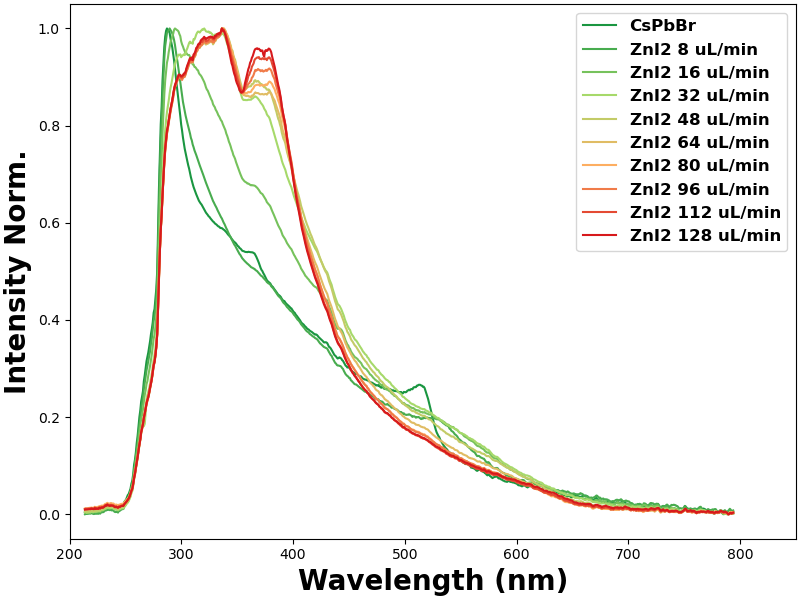

In [13]:
## Plot Normalized (by Max-min) PL profiles in each subfolder
f4, ax4 = plt.subplots(1, 1, figsize = (8, 6), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

# mpld3.disable_notebook()
# label = ['CsPbBr', 'CsPbBr_I_08uL', 'CsPbBr_I_16uL', 'CsPbBr_I_32uL', 'CsPbBr_I_64uL']
k = len(subfolder)
color_idx = np.linspace(0, 1, k)
for i in range(len(subfolder)):
    #ax2.set_title(os.path.basename(subfolder[i]), {'fontsize': 14, 'fontweight': fontweight})
    ax4.plot(df_norm2.Energy, getattr(df_norm2, os.path.basename(subfolder[i])), color=cmap(color_idx[i]), label=label[i])

legend_properties = {'weight':'bold', 'size':12}    
ax4.legend(prop=legend_properties)

ax4.set_xlim(200, 850)
ax4.set_xlabel('Wavelength (nm)', fontsize=labelsize, fontweight=fontweight)
ax4.set_ylabel('Intensity Norm.', fontsize=labelsize, fontweight=fontweight)

imag_name = '20220630_PL_CsPbBr_I.png'
#plt.savefig(cwd + '/' + imag_name, dpi = 300,  transparent=False)